In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install filterpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from filterpy.kalman import KalmanFilter
f = KalmanFilter (
    dim_x=2, # analizujemy predkosc i polozenie wiec 2 wymiary 
             # (jezeli predkosc i polozenie w w wymiarach to 4)
    
    dim_z=1 # liczba mierzonych wymiarow
) 

In [4]:
f.x = np.array([[2.],    # initial position
                [0.]])   # initial velocity

In [5]:
f.F = np.array([[1.,1.],
                [0.,1.]])

In [6]:
f.H = np.array([[1.,0.]]) # ktory wymiar jest mierzony?

In [7]:
f.R = 7 # szum podczas mierzenia wartosci

In [8]:
# Covariance matrix - (How do the two dimentions relate?)

# I think this is saying ze sa niezalezne
f.P = np.array([[1000.,    0.],
                [   0., 1000.] ])

In [9]:
from filterpy.common import Q_discrete_white_noise
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)

In [30]:
sim_len = 75

results = []
likelihood = []
deltas = []
s = 0
v = 10
a = 10
for t in range(sim_len):
    s += v
#     s = (a*t**2) / 2
    likelihood.append(f.log_likelihood_of(s)) 
    f.predict()
    deltas.append(f.x[0] - s)
    f.update(s)
    results.append(f.x)
len(results[:][0])

2

In [31]:
len([i for i in range(sim_len)])

75

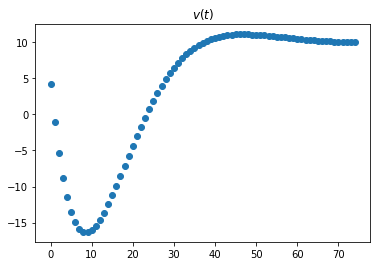

In [32]:
plt.title("$v(t)$")
plt.scatter([i for i in range(sim_len)],[speed[1] for speed in results])

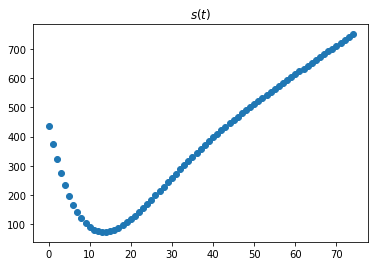

In [33]:
plt.title("$s(t)$")
plt.scatter([i for i in range(sim_len)],[speed[0] for speed in results])

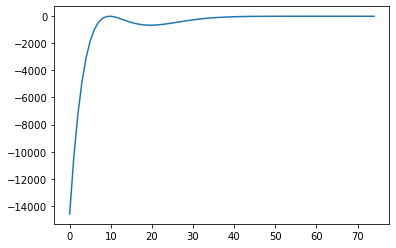

In [34]:
from math import exp

plt.plot(likelihood)

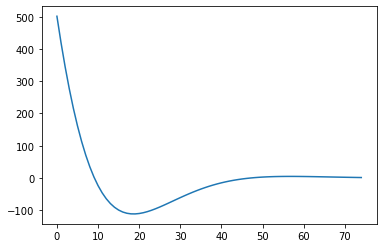

In [35]:
# plt.yscale('log')
plt.plot(deltas)